In [1]:
print()

In [2]:
import time

In [3]:
import os

In [4]:
import importlib

In [5]:
import sys
sys.path.append('/scratch/user/guillermo.vazquez/SAVE/scheduler_src/src')

In [6]:
import numpy as np
from itertools import combinations
import time

In [7]:
import pandas as pd

In [8]:
from ase import Atoms

In [9]:
import sqsfunc_mod
importlib.reload(sqsfunc_mod)

<module 'sqsfunc_mod' from '/scratch/user/guillermo.vazquez/SAVE/scheduler_src/src/sqsfunc_mod.py'>

In [10]:
from sqsfunc_mod import mini_structures_pool
from sqsfunc_mod import create_sampling
from sqsfunc_mod import add_unique, folder_or_delete, SQS_size_from_ELE_LIST, add_sym

In [11]:
from sqsfunc_mod import ase_to_rndstr_subl, create_rndst_subl, create_slurm_obj, SLURM_job

In [22]:
active_elements = ['Cr', 'Ta', 'Y',]
active_elements = sorted(active_elements)
st = mini_structures_pool(active_elements)
st._create_prim('boride_191', {'a0':3.0, 'c/a':1.1})


Atoms(symbols='CrB2', pbc=True, cell=[[1.4999999999999993, -2.598076211353316, 0.0], [1.4999999999999993, 2.598076211353316, 0.0], [0.0, 0.0, 3.3000000000000003]])


In [23]:
ELE_SUBL=[active_elements,['B'],['B']]
ELEMENTS = sqsfunc_mod.elements_from_subl(ELE_SUBL)
ELEMENTS

['B', 'Cr', 'Ta', 'Y']

In [34]:
ti = time.time()
ordered_elements, final_comp = create_sampling(ELE_SUBL, ELEMENTS, n_comps = 8, lower = 2, upper = 3)
print(time.time() - ti, 's')

0.003883838653564453 s


In [35]:
print()

In [36]:
final_comp.sum(axis = 0)

array([28.        ,  4.66666667,  4.66666667,  4.66666667])

In [37]:
final_comp.sum(axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [38]:
final_comp

array([[0.66666667, 0.04166667, 0.29166667, 0.        ],
       [0.66666667, 0.08333333, 0.25      , 0.        ],
       [0.66666667, 0.125     , 0.20833333, 0.        ],
       [0.66666667, 0.16666667, 0.16666667, 0.        ],
       [0.66666667, 0.20833333, 0.125     , 0.        ],
       [0.66666667, 0.25      , 0.08333333, 0.        ],
       [0.66666667, 0.29166667, 0.04166667, 0.        ],
       [0.66666667, 0.04166667, 0.        , 0.29166667],
       [0.66666667, 0.08333333, 0.        , 0.25      ],
       [0.66666667, 0.125     , 0.        , 0.20833333],
       [0.66666667, 0.16666667, 0.        , 0.16666667],
       [0.66666667, 0.20833333, 0.        , 0.125     ],
       [0.66666667, 0.25      , 0.        , 0.08333333],
       [0.66666667, 0.29166667, 0.        , 0.04166667],
       [0.66666667, 0.        , 0.04166667, 0.29166667],
       [0.66666667, 0.        , 0.08333333, 0.25      ],
       [0.66666667, 0.        , 0.125     , 0.20833333],
       [0.66666667, 0.        ,

In [39]:
df = pd .DataFrame(columns = ELEMENTS, data = final_comp)

In [40]:
df

,B,Cr,Ta,Y
0,0.666667,0.041667,0.291667,0.000000
1,0.666667,0.083333,0.250000,0.000000
2,0.666667,0.125000,0.208333,0.000000
3,0.666667,0.166667,0.166667,0.000000
4,0.666667,0.208333,0.125000,0.000000
5,0.666667,0.250000,0.083333,0.000000
6,0.666667,0.291667,0.041667,0.000000
7,0.666667,0.041667,0.000000,0.291667
8,0.666667,0.083333,0.000000,0.250000
9,0.666667,0.125000,0.000000,0.208333


In [41]:
RUN_FILT = True
df_folder = "df_folder"

In [42]:
df_raw = df.copy()

if RUN_FILT:    
    comps=df_raw[ELEMENTS].values
    
    
    df_comps = pd.DataFrame(columns=ELEMENTS+['atom_size','sublattice','diff','unique'])
    for ii,i in enumerate(comps):
        
        

        #size=SQS_size(40, res, SPACEGROUP, 6)
        size = SQS_size_from_ELE_LIST(60, ELE_SUBL, ELEMENTS, i,  5, MIN=40)
        print(size)
        
        df_comps.loc[ii,ELEMENTS]=i
        df_comps.loc[ii,['atom_size','sublattice','diff']]=size[0],size[1],size[2]
        df_comps.loc[ii,'unique']='Y'

    df_comps=add_unique(df_comps)
    df_comps=add_sym(df_comps)

    df_filt=df_comps[df_comps['sym']=='Y'].copy()
    

    print(len(df_comps[df_comps['sym']!='Y']))

    
    folder_or_delete(df_folder)
    df_comps.to_pickle(df_folder+"/df_comps")
    df_filt.to_pickle(df_folder+"/df_filt")
else:
    df_comps=pd.read_pickle(df_folder+"/df_comps")
    df_filt=pd.read_pickle(df_folder+"/df_filt")

(48, array([[32.,  0.,  0.,  0.],
       [ 0.,  2., 14.,  0.]]), 5.551115123125783e-17)
(48, array([[32.,  0.,  0.,  0.],
       [ 0.,  4., 12.,  0.]]), 0.0)
(48, array([[32.,  0.,  0.,  0.],
       [ 0.,  6., 10.,  0.]]), 2.7755575615628914e-17)
(48, array([[32.,  0.,  0.,  0.],
       [ 0.,  8.,  8.,  0.]]), 0.0)
(48, array([[32.,  0.,  0.,  0.],
       [ 0., 10.,  6.,  0.]]), 2.7755575615628914e-17)
(48, array([[32.,  0.,  0.,  0.],
       [ 0., 12.,  4.,  0.]]), 0.0)
(48, array([[32.,  0.,  0.,  0.],
       [ 0., 14.,  2.,  0.]]), 5.551115123125783e-17)
(48, array([[32.,  0.,  0.,  0.],
       [ 0.,  2.,  0., 14.]]), 5.551115123125783e-17)
(48, array([[32.,  0.,  0.,  0.],
       [ 0.,  4.,  0., 12.]]), 0.0)
(48, array([[32.,  0.,  0.,  0.],
       [ 0.,  6.,  0., 10.]]), 2.7755575615628914e-17)
(48, array([[32.,  0.,  0.,  0.],
       [ 0.,  8.,  0.,  8.]]), 0.0)
(48, array([[32.,  0.,  0.,  0.],
       [ 0., 10.,  0.,  6.]]), 2.7755575615628914e-17)
(48, array([[32.,  0.,  0.,  0

(48, array([[ 0.,  6.,  8.,  0.,  0.,  0.,  2.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  8.,  2.,  0.,  0.,  0.,  6.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  8.,  4.,  0.,  0.,  0.,  4.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  8.,  6.,  0.,  0.,  0.,  2.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0., 10.,  2.,  0.,  0.,  0.,  4.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 2.7755575615628914e-17)
(48, array([[ 0., 10.,  4.,  0.,  0.,  0.,  2.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 2.7755575615628914e-17)
(48, array([[ 0., 12.,  2.,  0.,  0.,  0.,  2.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  2.,  0.,  2., 12.,  0.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  2.,  0.,  4., 10.,  0.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 2.7755575615628914e-17)
(48, array([[ 0.,  2.,  0.,  6.,  8.,  0., 

(48, array([[ 0.,  8.,  0.,  0.,  6.,  2.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0., 10.,  0.,  0.,  2.,  4.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 2.7755575615628914e-17)
(48, array([[ 0., 10.,  0.,  0.,  4.,  2.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 2.7755575615628914e-17)
(48, array([[ 0., 12.,  0.,  0.,  2.,  2.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  2.,  0.,  0.,  2.,  0., 12.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  2.,  0.,  0.,  4.,  0., 10.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 2.7755575615628914e-17)
(48, array([[ 0.,  2.,  0.,  0.,  6.,  0.,  8.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  2.,  0.,  0.,  8.,  0.,  6.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  2.,  0.,  0., 10.,  0.,  4.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 2.7755575615628914e-17)
(48, array([[ 0.,  2.,  

(48, array([[ 0.,  0.,  4.,  2.,  0.,  0., 10.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 2.7755575615628914e-17)
(48, array([[ 0.,  0.,  4.,  4.,  0.,  0.,  8.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  4.,  6.,  0.,  0.,  6.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  4.,  8.,  0.,  0.,  4.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  4., 10.,  0.,  0.,  2.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 2.7755575615628914e-17)
(48, array([[ 0.,  0.,  6.,  2.,  0.,  0.,  8.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  6.,  4.,  0.,  0.,  6.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  6.,  6.,  0.,  0.,  4.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  6.,  8.,  0.,  0.,  2.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  8.,  2.,  0.,  0.,  6.],
       [32., 

(48, array([[ 0.,  0.,  0.,  4.,  8.,  4.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  0.,  4., 10.,  2.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 2.7755575615628914e-17)
(48, array([[ 0.,  0.,  0.,  6.,  2.,  8.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  0.,  6.,  4.,  6.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  0.,  6.,  6.,  4.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  0.,  6.,  8.,  2.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  0.,  8.,  2.,  6.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  0.,  8.,  4.,  4.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  0.,  8.,  6.,  2.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  0., 10.,  2.,  4.,  0.],
       [32.,  0.,  0.,  0.,  0.,

(48, array([[ 0.,  2., 10.,  2.,  2.,  0.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 2.7755575615628914e-17)
(48, array([[ 0.,  4.,  2.,  2.,  8.,  0.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  4.,  2.,  4.,  6.,  0.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  4.,  2.,  6.,  4.,  0.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  4.,  2.,  8.,  2.,  0.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  4.,  4.,  2.,  6.,  0.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  4.,  4.,  4.,  4.,  0.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  4.,  4.,  6.,  2.,  0.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  4.,  6.,  2.,  4.,  0.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  4.,  6.,  4.,  2.,  0.,  0.],
       [32.,  0.,  0.,  0.,  0.,

(48, array([[ 0.,  2.,  2.,  0., 10.,  2.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 2.7755575615628914e-17)
(48, array([[ 0.,  2.,  4.,  0.,  2.,  8.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  2.,  4.,  0.,  4.,  6.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  2.,  4.,  0.,  6.,  4.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  2.,  4.,  0.,  8.,  2.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  2.,  6.,  0.,  2.,  6.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  2.,  6.,  0.,  4.,  4.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  2.,  6.,  0.,  6.,  2.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  2.,  8.,  0.,  2.,  4.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  2.,  8.,  0.,  4.,  2.,  0.],
       [32.,  0.,  0.,  0.,  0.,

(48, array([[ 0.,  2.,  0.,  6.,  2.,  6.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  2.,  0.,  6.,  4.,  4.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  2.,  0.,  6.,  6.,  2.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  2.,  0.,  8.,  2.,  4.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  2.,  0.,  8.,  4.,  2.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  2.,  0., 10.,  2.,  2.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 2.7755575615628914e-17)
(48, array([[ 0.,  4.,  0.,  2.,  2.,  8.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  4.,  0.,  2.,  4.,  6.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  4.,  0.,  2.,  6.,  4.,  0.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  4.,  0.,  2.,  8.,  2.,  0.],
       [32.,  0.,  0.,  0.,  0.,

(48, array([[ 0.,  6.,  0.,  2.,  0.,  4.,  4.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  6.,  0.,  2.,  0.,  6.,  2.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  6.,  0.,  4.,  0.,  2.,  4.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  6.,  0.,  4.,  0.,  4.,  2.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  6.,  0.,  6.,  0.,  2.,  2.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  8.,  0.,  2.,  0.,  2.,  4.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  8.,  0.,  2.,  0.,  4.,  2.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  8.,  0.,  4.,  0.,  2.,  2.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0., 10.,  0.,  2.,  0.,  2.,  2.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 2.7755575615628914e-17)
(48, array([[ 0.,  2.,  0.,  0.,  2.,  2., 10.],
       [32.,  0.,  0.,  0.,  0.,

(48, array([[ 0.,  0.,  2.,  4.,  6.,  0.,  4.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  2.,  4.,  8.,  0.,  2.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  2.,  6.,  2.,  0.,  6.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  2.,  6.,  4.,  0.,  4.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  2.,  6.,  6.,  0.,  2.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  2.,  8.,  2.,  0.,  4.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  2.,  8.,  4.,  0.,  2.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  2., 10.,  2.,  0.,  2.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 2.7755575615628914e-17)
(48, array([[ 0.,  0.,  4.,  2.,  2.,  0.,  8.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  4.,  2.,  4.,  0.,  6.],
       [32.,  0.,  0.,  0.,  0.,

(48, array([[ 0.,  0.,  4.,  0.,  6.,  2.,  4.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  4.,  0.,  6.,  4.,  2.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  4.,  0.,  8.,  2.,  2.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  6.,  0.,  2.,  2.,  6.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  6.,  0.,  2.,  4.,  4.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  6.,  0.,  2.,  6.,  2.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  6.,  0.,  4.,  2.,  4.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  6.,  0.,  4.,  4.,  2.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  6.,  0.,  6.,  2.,  2.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)
(48, array([[ 0.,  0.,  8.,  0.,  2.,  2.,  4.],
       [32.,  0.,  0.,  0.,  0.,  0.,  0.]]), 0.0)


In [43]:
df_filt

,B,Cr,Ta,Y,atom_size,sublattice,diff,unique,sym
0,0.666667,0.041667,0.291667,0.0,48,"[[32.0, 0.0, 0.0, 0.0], [0.0, 2.0, 14.0, 0.0]]",0.0,Y,Y
1,0.666667,0.083333,0.25,0.0,48,"[[32.0, 0.0, 0.0, 0.0], [0.0, 4.0, 12.0, 0.0]]",0.0,Y,Y
2,0.666667,0.125,0.208333,0.0,48,"[[32.0, 0.0, 0.0, 0.0], [0.0, 6.0, 10.0, 0.0]]",0.0,Y,Y
3,0.666667,0.166667,0.166667,0.0,48,"[[32.0, 0.0, 0.0, 0.0], [0.0, 8.0, 8.0, 0.0]]",0.0,Y,Y
21,0.666667,0.041667,0.041667,0.25,48,"[[32.0, 0.0, 0.0, 0.0], [0.0, 2.0, 2.0, 12.0]]",0.0,Y,Y
22,0.666667,0.041667,0.083333,0.208333,48,"[[32.0, 0.0, 0.0, 0.0], [0.0, 2.0, 4.0, 10.0]]",0.0,Y,Y
23,0.666667,0.041667,0.125,0.166667,48,"[[32.0, 0.0, 0.0, 0.0], [0.0, 2.0, 6.0, 8.0]]",0.0,Y,Y
28,0.666667,0.083333,0.083333,0.166667,48,"[[32.0, 0.0, 0.0, 0.0], [0.0, 4.0, 4.0, 8.0]]",0.0,Y,Y
29,0.666667,0.083333,0.125,0.125,48,"[[32.0, 0.0, 0.0, 0.0], [0.0, 4.0, 6.0, 6.0]]",0.0,Y,Y


In [44]:
DELETE_AND_LOAD = True
EXECUTE = False
CANCEL = False

In [45]:
SQS_ase = st.prim.copy()

dic_options={'clus2':st.a0*3,
    'clus3':st.a0*2,
    'clus4':st.a0*1.5,
    'ntasks':10,
    'ntasks_per_node':10,
    }

In [46]:
import sqsfunc_mod
importlib.reload(sqsfunc_mod)

<module 'sqsfunc_mod' from '/scratch/user/guillermo.vazquez/SAVE/scheduler_src/src/sqsfunc_mod.py'>

In [47]:
from sqsfunc_mod import mini_structures_pool
from sqsfunc_mod import create_sampling
from sqsfunc_mod import add_unique, folder_or_delete, SQS_size_from_ELE_LIST, add_sym

In [48]:
from sqsfunc_mod import ase_to_rndstr_subl, create_rndst_subl, create_slurm_obj, SLURM_job

In [49]:
dir_strings=[]
co=0


slurm_list=[]

comps_dir='SQS_191/'


if not os.path.exists(comps_dir):
    os.mkdir(comps_dir)

for i,row in df_filt.iterrows():
    print('################')
    print('{:04}'.format(i))
    dir_strings.append(comps_dir+'comp'+'{:04d}'.format(i))
    print(dir_strings[co])
    
    
    
    folder_or_delete(dir_strings[co],delete=DELETE_AND_LOAD)
    
    if DELETE_AND_LOAD:
        
        rndstr=ase_to_rndstr_subl(SQS_ase,ELE_SUBL)
        size=(row['atom_size'],row['sublattice'],row['diff'])
        rndstr_comp=create_rndst_subl(size , rndstr , ELEMENTS, ELE_SUBL, dir_strings[co]+'/rndstr.in')
        
    
        create_slurm_obj(size,'/scratch/user/guillermo.vazquez/SAVE/scheduler_src/reference_files/runEMPTY.slurm',
                         dic_options,file_name=dir_strings[co]+'/job.SLURM')
        slurm_list.append(SLURM_job(dir_strings[co]))
        slurm_list[co].from_file(dir_strings[co]+'/job.SLURM')
    else:
        slurm_list.append(SLURM_job(dir_strings[co]))
        
        
    co=co+1
    
if EXECUTE:
    co=0
    for i,row in df_filt.iterrows():
        slurm_list[co].execute()
        time.sleep(5+5*np.random.random())
        co=co+1
if CANCEL:
    co=0
    for i,row in df_filt.iterrows():
        slurm_list[co].cancel()
        co=co+1
        

################
0000
SQS_191/comp0000
SLURM LOG created for directory /scratch/user/guillermo.vazquez/SAVE/borides_0627/SQS_191/comp0000 at: 2024-06-27T10:33:22.420030

################
0001
SQS_191/comp0001
SLURM LOG created for directory /scratch/user/guillermo.vazquez/SAVE/borides_0627/SQS_191/comp0001 at: 2024-06-27T10:33:22.447909

################
0002
SQS_191/comp0002
SLURM LOG created for directory /scratch/user/guillermo.vazquez/SAVE/borides_0627/SQS_191/comp0002 at: 2024-06-27T10:33:22.469018

################
0003
SQS_191/comp0003
SLURM LOG created for directory /scratch/user/guillermo.vazquez/SAVE/borides_0627/SQS_191/comp0003 at: 2024-06-27T10:33:22.489726

################
0021
SQS_191/comp0021
SLURM LOG created for directory /scratch/user/guillermo.vazquez/SAVE/borides_0627/SQS_191/comp0021 at: 2024-06-27T10:33:22.509217

################
0022
SQS_191/comp0022
SLURM LOG created for directory /scratch/user/guillermo.vazquez/SAVE/borides_0627/SQS_191/comp0022 at: 2024-06-

## LINE

In [31]:
from sqs_lines_mod import rndstr_structure, supercell_structure, sqs_one
from sqs_lines_mod import read_atat_rndstr,read_atat_sqs, create_sqs_line, get_min_arr_of_arr

In [32]:
import matplotlib.pyplot as plt

SQS_191/comp0000
[2, 2, 2, 1, 2, 2, 2, 5, 4, 2]
(0, 1)
1.0 -23.078777


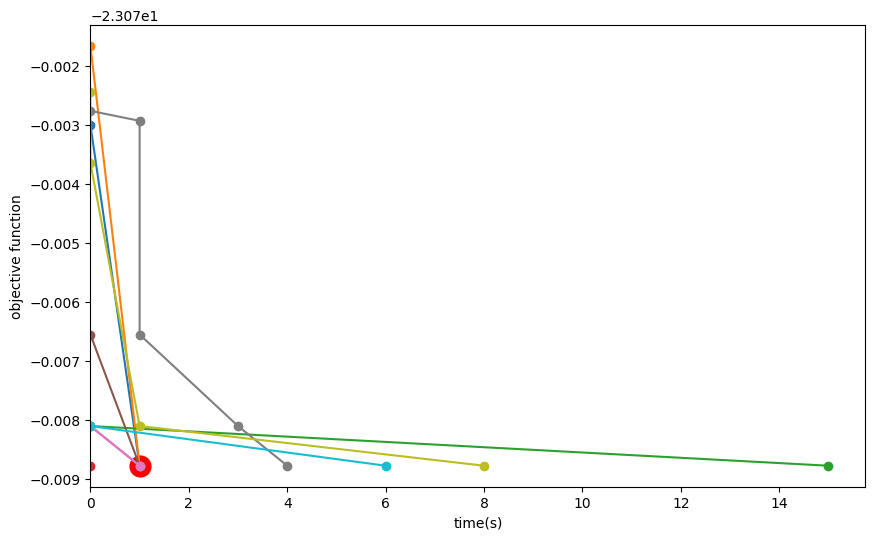

SQS_191/comp0001
[4, 9, 5, 1, 3, 3, 5, 6, 4, 6]
(0, 3)
39.0 -30.391269


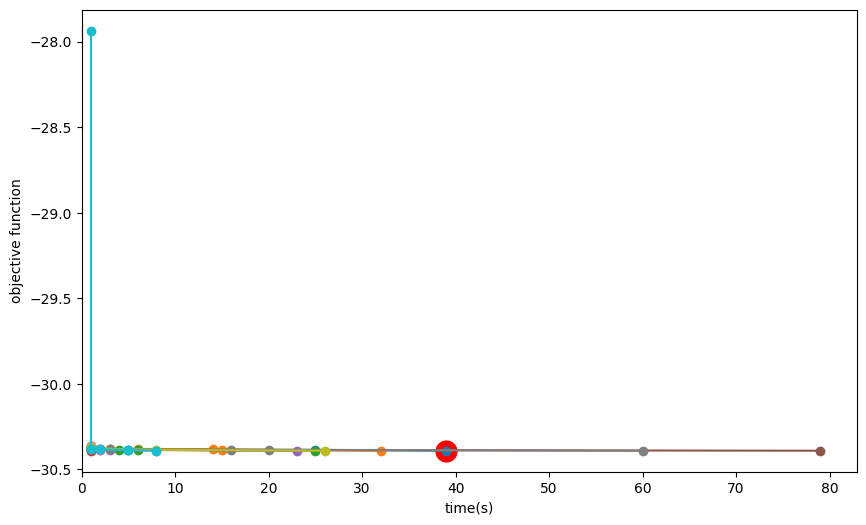

SQS_191/comp0002
[7, 10, 6, 8, 6, 8, 7, 8, 9, 7]
(0, 6)
357.0 -23.076917


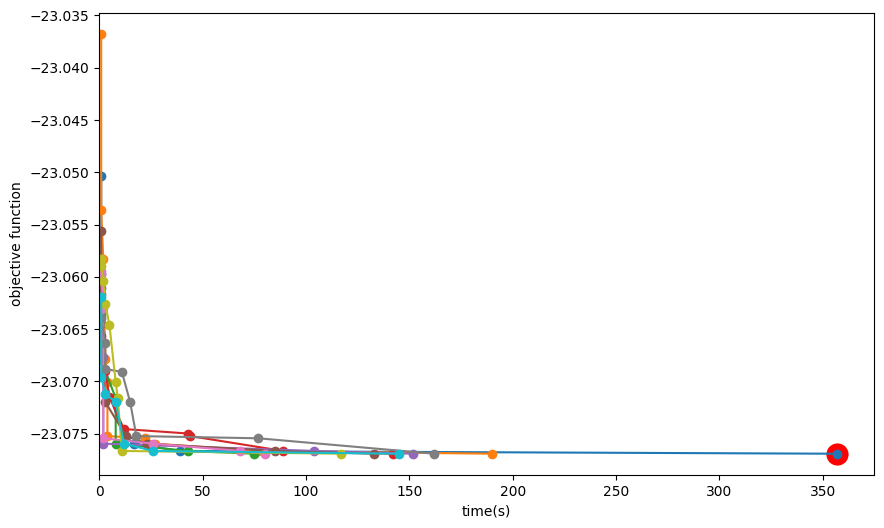

SQS_191/comp0003
[8, 9, 7, 8, 3, 5, 5, 6, 5, 8]
(0, 7)
689.0 -46.809635


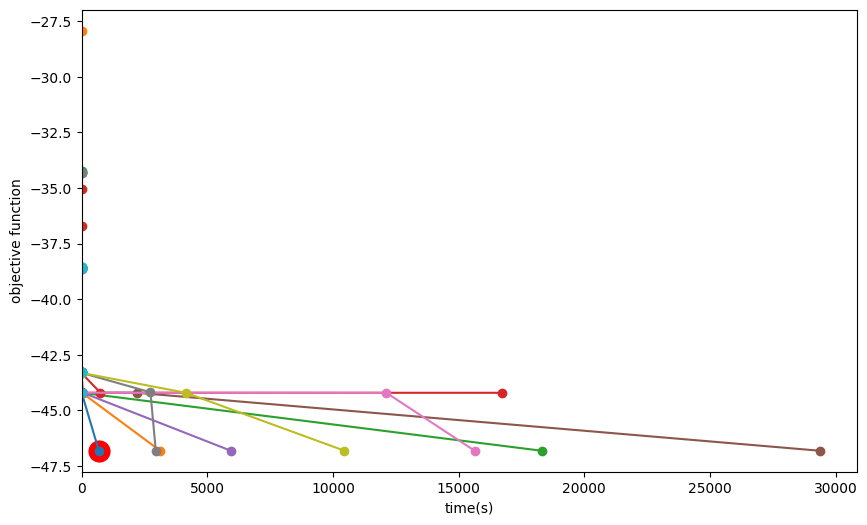

SQS_191/comp0105
[7, 8, 12, 8, 11, 10, 7, 6, 10, 8]
(0, 6)
423.0 -23.107971


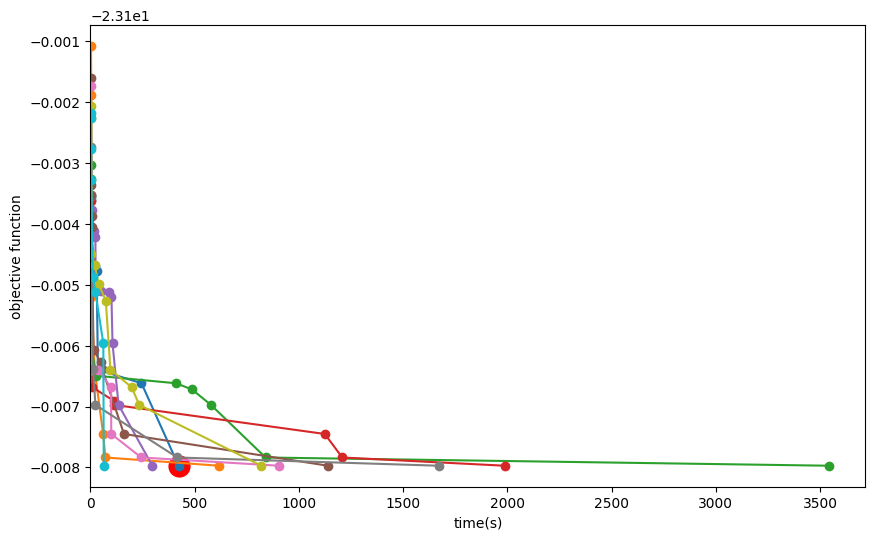

SQS_191/comp0106
[13, 10, 8, 6, 7, 13, 11, 8, 11, 13]
(0, 12)
3241.0 -23.107372


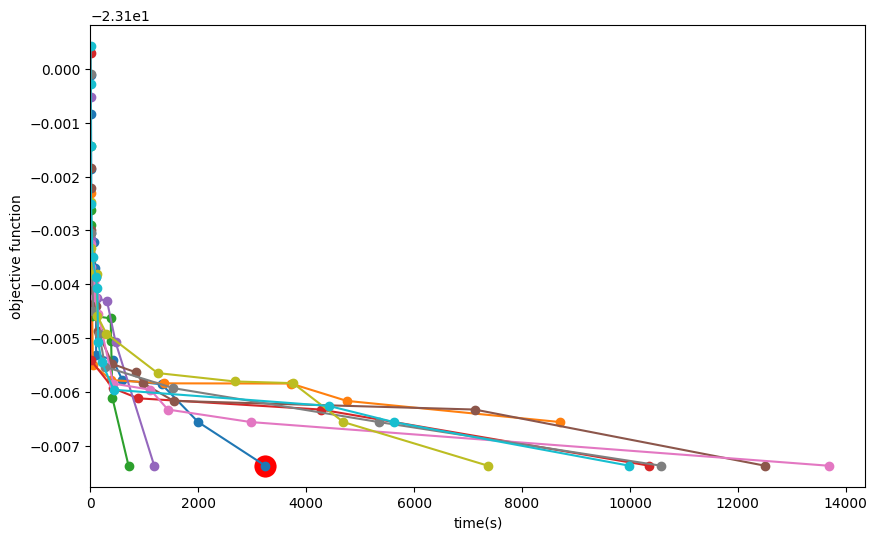

SQS_191/comp0107
[12, 17, 7, 10, 15, 10, 14, 10, 8, 9]
(1, 16)
26183.0 -23.106866


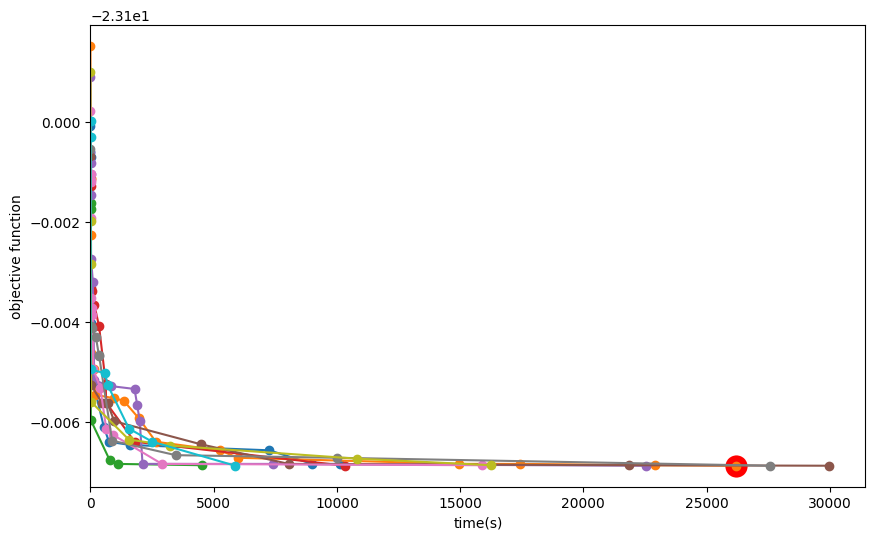

SQS_191/comp0112
[10, 9, 3, 11, 7, 11, 11, 9, 8, 10]
(0, 9)
2664.0 -30.425667


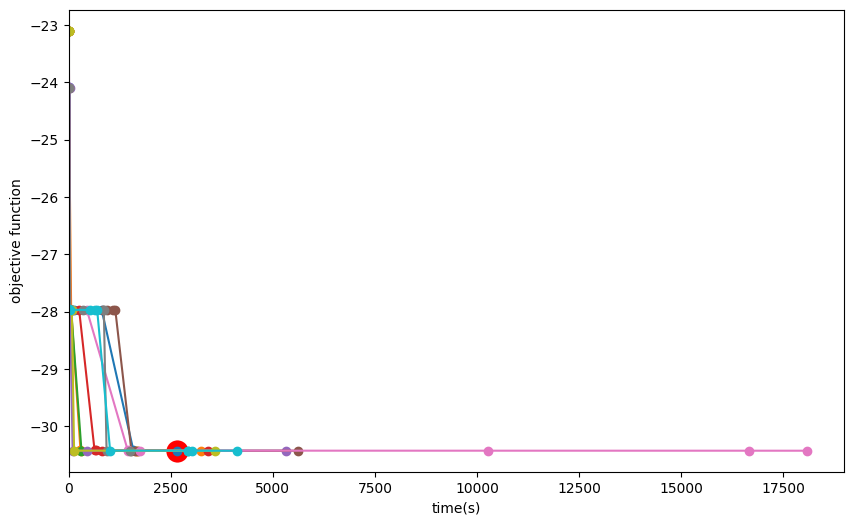

SQS_191/comp0113
[12, 11, 11, 10, 11, 8, 13, 8, 10, 20]
(9, 19)
15374.0 -23.109817


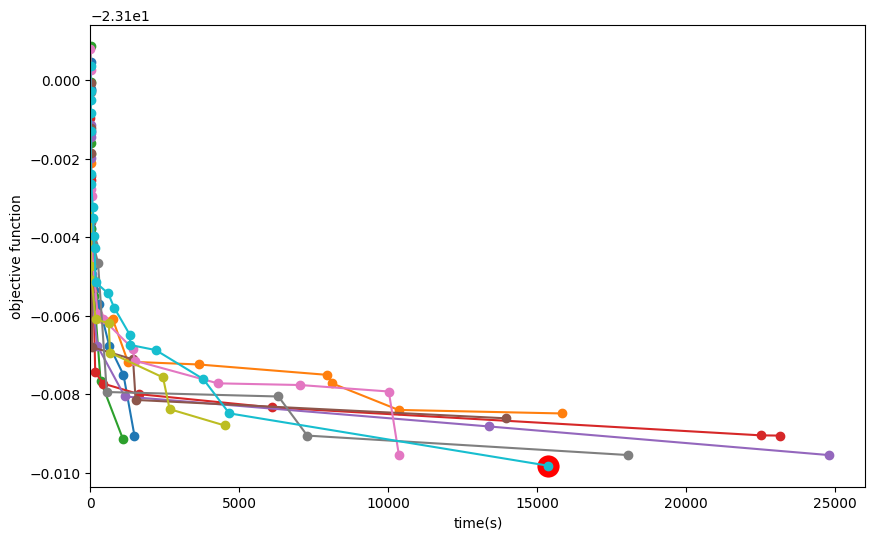

SQS_191/comp0525
[8, 12, 8, 10, 8, 11, 6, 11, 8, 6]
(3, 9)
30208.0 -23.102517


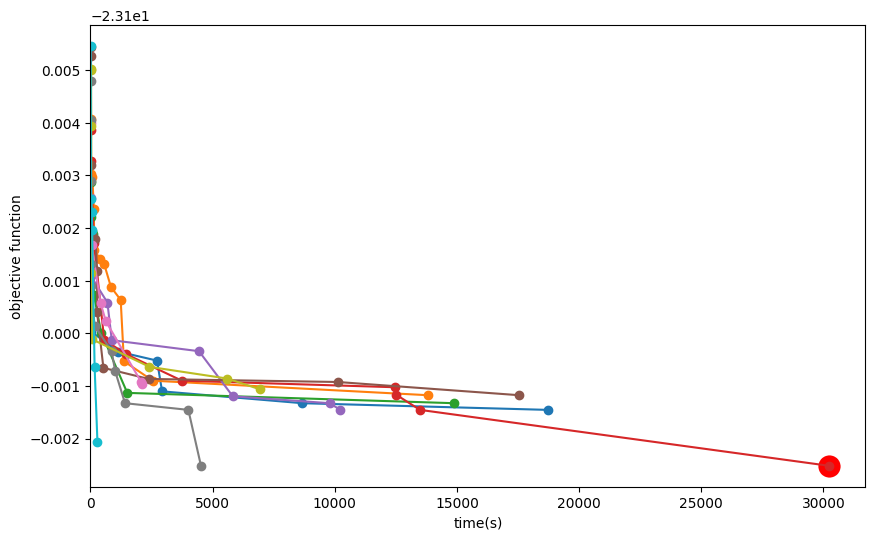

SQS_191/comp0526
[11, 15, 5, 11, 16, 7, 7, 7, 14, 10]
(2, 4)
983.0 -23.099783


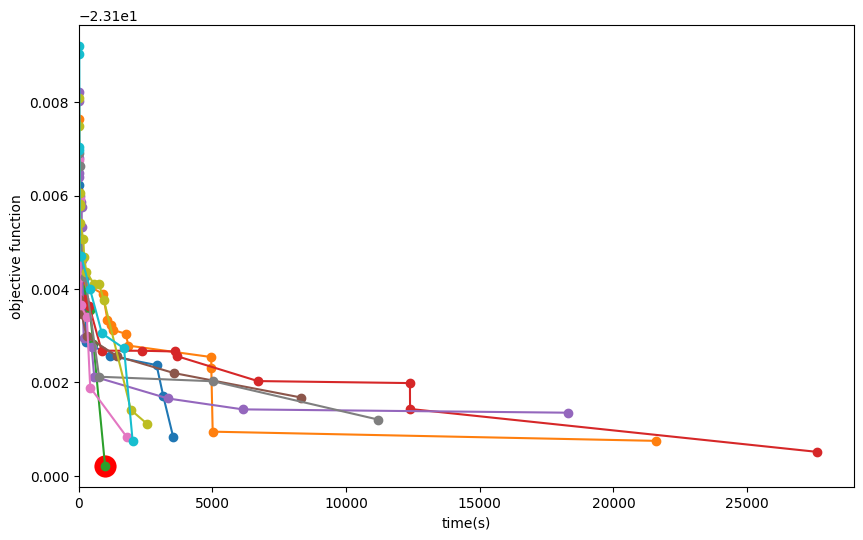

SQS_191/comp0527
[10, 11, 8, 10, 9, 7, 11, 8, 10, 10]
(7, 7)
19321.0 -23.104315


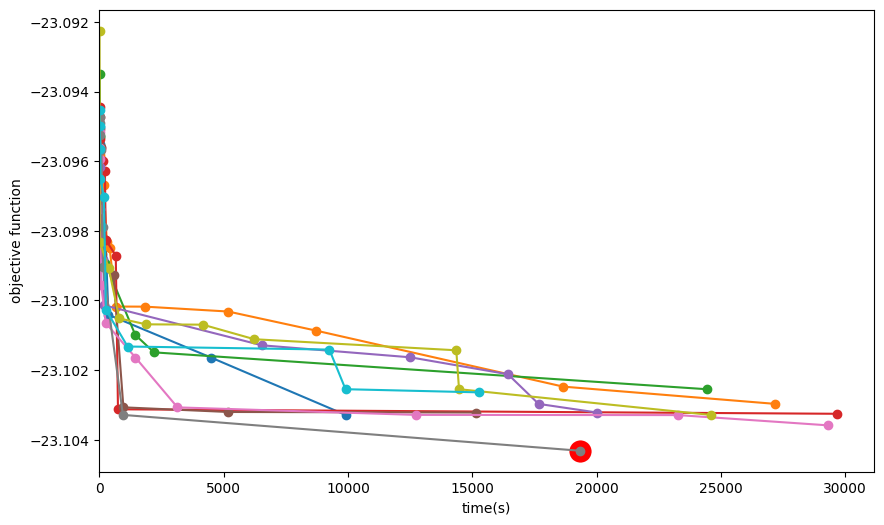

SQS_191/comp0531
[9, 9, 10, 7, 11, 13, 11, 7, 8, 10]
(1, 8)
6300.0 -23.099434


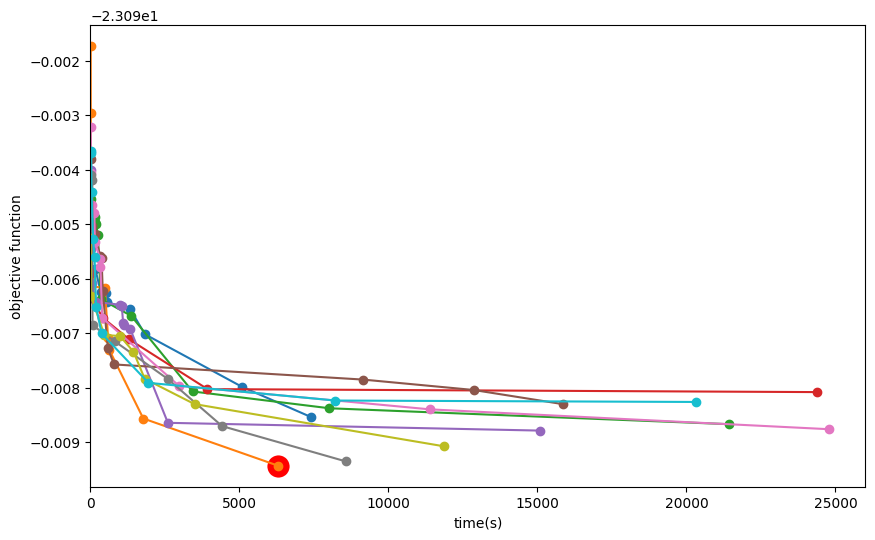

SQS_191/comp0545
[16, 16, 9, 18, 9, 8, 6, 15, 11, 13]
(5, 7)
7465.0 -30.43035


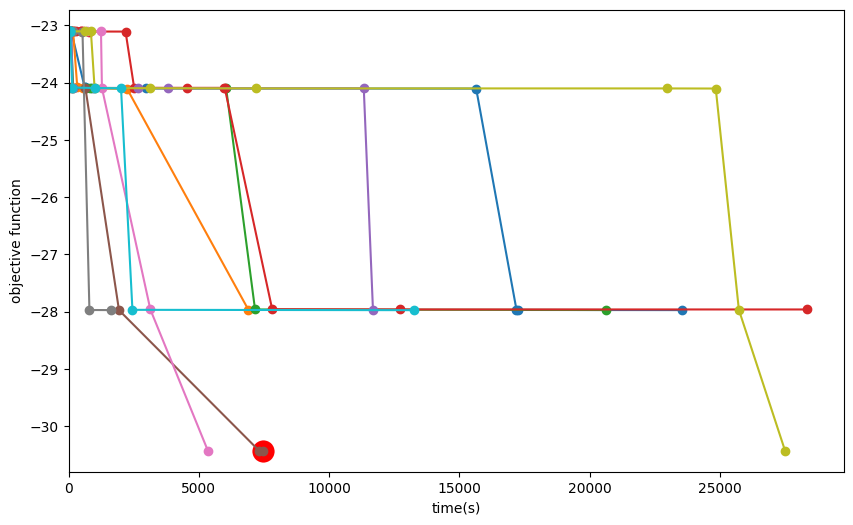

In [33]:
NCORE=10
sqs_chosen=[]
ZERO = 1E-12
for dir_i in dir_strings:
    sqs_obj_funs=[]
    sqss=[]
    print(dir_i)
    for i in range(NCORE):
        sqss.append(create_sqs_line(dir_i+'/',i))
        sqs_obj_funs.append(np.array([i.obj_fun for i in sqss[-1]]))
    sqs_obj_funs=np.array(sqs_obj_funs,dtype=object)
    all_sqss=[len(ip) for ip in sqs_obj_funs]
    
    print(all_sqss)
    if np.sum(all_sqss)<ZERO:
        rn=rndstr_structure(dir_i+'/rndstr.in')
        print(rn)
        sqs_chosen.append(rn)
        print('NO PLOT')
        continue
    else:
        fig, ax = plt.subplots(figsize=(10, 6))
        for i in range(NCORE):
            ax.plot([i.total_time for i in sqss[i]],[i.obj_fun for i in sqss[i]],'o-')
        obj_ind = get_min_arr_of_arr(sqs_obj_funs)
        print(obj_ind)
        print(sqss[obj_ind[0]][obj_ind[1]].total_time,sqss[obj_ind[0]][obj_ind[1]].obj_fun)
        
        
        ax.scatter(sqss[obj_ind[0]][obj_ind[1]].total_time,sqss[obj_ind[0]][obj_ind[1]].obj_fun,marker='o',edgecolor='r',linewidth=10)
        ax.set_ylabel(r'objective function')
        ax.set_xlabel(r'time(s)')


        sqs_chosen.append(sqss[obj_ind[0]][obj_ind[1]])


        ax.set_xlim(0)#,259200
        plt.show()

In [34]:
sqs_chosen

[SQS_file_N    :
 SQS_191/comp0000/bestsqs-20.out
 SQS_file_PATH    :
 /scratch/user/guillermo.vazquez/SAVE/borides_sqs_min/SQS_191/comp0000/bestsqs-20.out
 SQS_dir_PATH    :
 /scratch/user/guillermo.vazquez/SAVE/borides_sqs_min/SQS_191/comp0000
 rndstr_PATH    :
 /scratch/user/guillermo.vazquez/SAVE/borides_sqs_min/SQS_191/comp0000/rndstr.in
 digit_reference    :
 20
 clusters_PATH    :
 /scratch/user/guillermo.vazquez/SAVE/borides_sqs_min/SQS_191/comp0000/clusters.out
 corr_PATH    :
 /scratch/user/guillermo.vazquez/SAVE/borides_sqs_min/SQS_191/comp0000/bestcorr-20.out
 total_time    :
 1.0
 sup_obj    :
 file_N    :
 SQS_191/comp0000/bestsqs-20.out
 rndstr_FC    :
 1.500000 -2.598076 0.000000
 1.500000 2.598076 0.000000
 0.000000 0.000000 3.300000
 -2.000000 -1.000000 1.000000
 0.000000 2.000000 1.000000
 -2.000000 1.000000 -2.000000
 -1.000001 1.000000 1.000000 Hf
 -2.000001 2.000000 -1.000000 Hf
 -4.000001 2.000000 0.000000 Hf
 -3.000001 1.000000 -0.000000 Hf
 -2.000001 1.000000 -